In [1]:
%pip install svgwrite

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.7/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import svgwrite

In [62]:
class Playfield:
    def __init__(self, rows:int = 40, cols:int = 10):
        self.rows = rows
        self.cols = cols
        self.playfield = [[None] * cols for _ in range(rows)]
    def __str__(self) -> str:
        return str(self.playfield)
    def _repr_svg_(self) -> str:
        side_len = 10
        dwg = svgwrite.Drawing()
        dwg.viewbox(0,0,800,550)

        for row in range(self.rows):
            for col in range(self.cols):
                left_top = (col*side_len, row*side_len)
                width_height = (side_len, side_len)
                dwg.add(dwg.rect(left_top, width_height, stroke='white'))
        return dwg.tostring()

In [63]:
pf = Playfield()

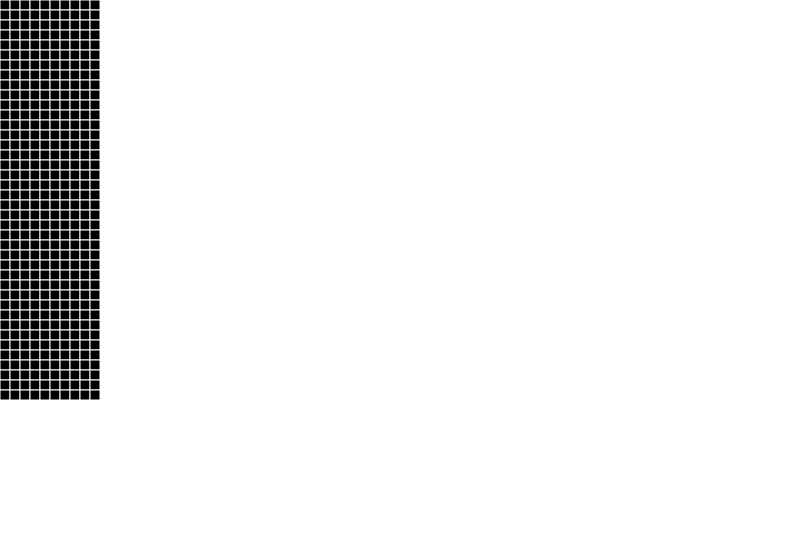

In [64]:
pf

In [104]:
class Piece:
    def __init__(self, rep:str):
        self.arr = []
        for line in rep.split('\n'):
            row = [True if ch == '*' else False for ch in line]
            self.arr.append(row)
    def _repr_svg_(self) -> str:
        side_len = 10
        dwg = svgwrite.Drawing()
        dwg.viewbox(0,0,800,30)

        for row in range(len(self.arr)):
            for col in range(len(self.arr[0])):
                left_top = (col*side_len, row*side_len)
                width_height = (side_len, side_len)
                fill = 'blue' if self.arr[row][col] else 'black'
                dwg.add(dwg.rect(left_top, width_height, fill=fill))
        return dwg.tostring()

In [105]:
Piece("**-\n-**")

In [106]:
import os

class PieceLoader:
    def load(self, directory:str) -> None:
        self._pieces = {}
        for filename in os.listdir(directory):
            f = os.path.join(directory, filename)
            if os.path.isfile(f):
                with open(f, 'r') as inf:
                    data = inf.read()
                    self._pieces[filename] = Piece(data)
    @property
    def pieces(self):
        return self._pieces

    def __init__(self, directory:str = "data/"):
        self.load(directory)

In [107]:
ldr = PieceLoader()

In [108]:
from IPython.display import SVG, display

    
for name, piece in ldr.pieces.items():
    print(name)
    display(SVG(piece._repr_svg_()))


i


z


t


s


j


q


l
